In [1]:
dependencies <- c("here", "readr", "dplyr", "tidyr", "lubridate",
                 "ggplot2", "stringr", "tidytext", "ggthemes", "tidytuesdayR")

# Use lapply to apply the library function to each element in the list
lapply(dependencies, library, character.only = TRUE)

# Adjust plot display size
options(repr.plot.width=20, repr.plot.height=20, units = "cm")

here() starts at /home/katavga/Documents/Coursework/140.777/Project 1


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




[[1]]
[1] "here"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
[1] "readr"     "here"      "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     

[[3]]
 [1] "dplyr"     "readr"     "here"      "stats"     "graphics"  "grDevices"
 [7] "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "tidyr"     "dplyr"     "readr"     "here"      "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[5]]
 [1] "lubridate" "tidyr"     "dplyr"     "readr"     "here"      "stats"    
 [7] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[6]]
 [1] "ggplot2"   "lubridate" "tidyr"     "dplyr"     "readr"     "here"     
 [7] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[13] "base"     

[[7]]
 [1] "stringr"   "ggplot2"   "lubridate" "tidyr"     "dplyr"     "readr"    
 [7] "here"      "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[13] "methods"   "base"     

[[8]]
 [1] "tidytext"  "stringr"   "ggplot2"   "lubridate" "tidyr"     "dplyr"    
 [7] "readr"     "here"      "stats"     "graphics"  "grDevices" "utils"    
[13] "datasets"  "methods"   "base"     

[[9]]
 [1] "ggthemes"  "tidytext"  "stringr"   "ggplot2"   "lubridate" "tidyr"    
 [7] "dplyr"     "readr"     "here"      "stats"     "graphics"  "grDevices"
[13] "utils"     "datasets"  "methods"   "base"     

[[10]]
 [1] "tidytuesdayR" "ggthemes"     "tidytext"     "stringr"      "ggplot2"     
 [6] "lubridate"    "tidyr"        "dplyr"        "readr"        "here"        
[11] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[16] "methods"      "base"

In [2]:
# Load previously saved data from TidyTuesday GitHub: 2020-03-10
# Source: https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-03-10

tuition_cost <- readRDS(here("data", "tuition_cost.RDS"))
tuition_income <- readRDS(here("data", "tuition_income.RDS"))
salary_potential <- readRDS(here("data", "salary_potential.RDS"))
historical_tuition <- readRDS(here("data", "historical_tuition.RDS"))
diversity_school <- readRDS(here("data", "diversity_school.RDS"))

`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.


state,race,relative_fraction
<fct>,<chr>,<dbl>
Alabama,American Indian / Alaska Native,0.0068926230
Alabama,Asian,0.0175796866
Alabama,Black,0.2702181387
Alabama,Hispanic,0.0291828794
Alabama,Native Hawaiian / Pacific Islander,0.0009094664
Alabama,Two Or More Races,0.0168601087


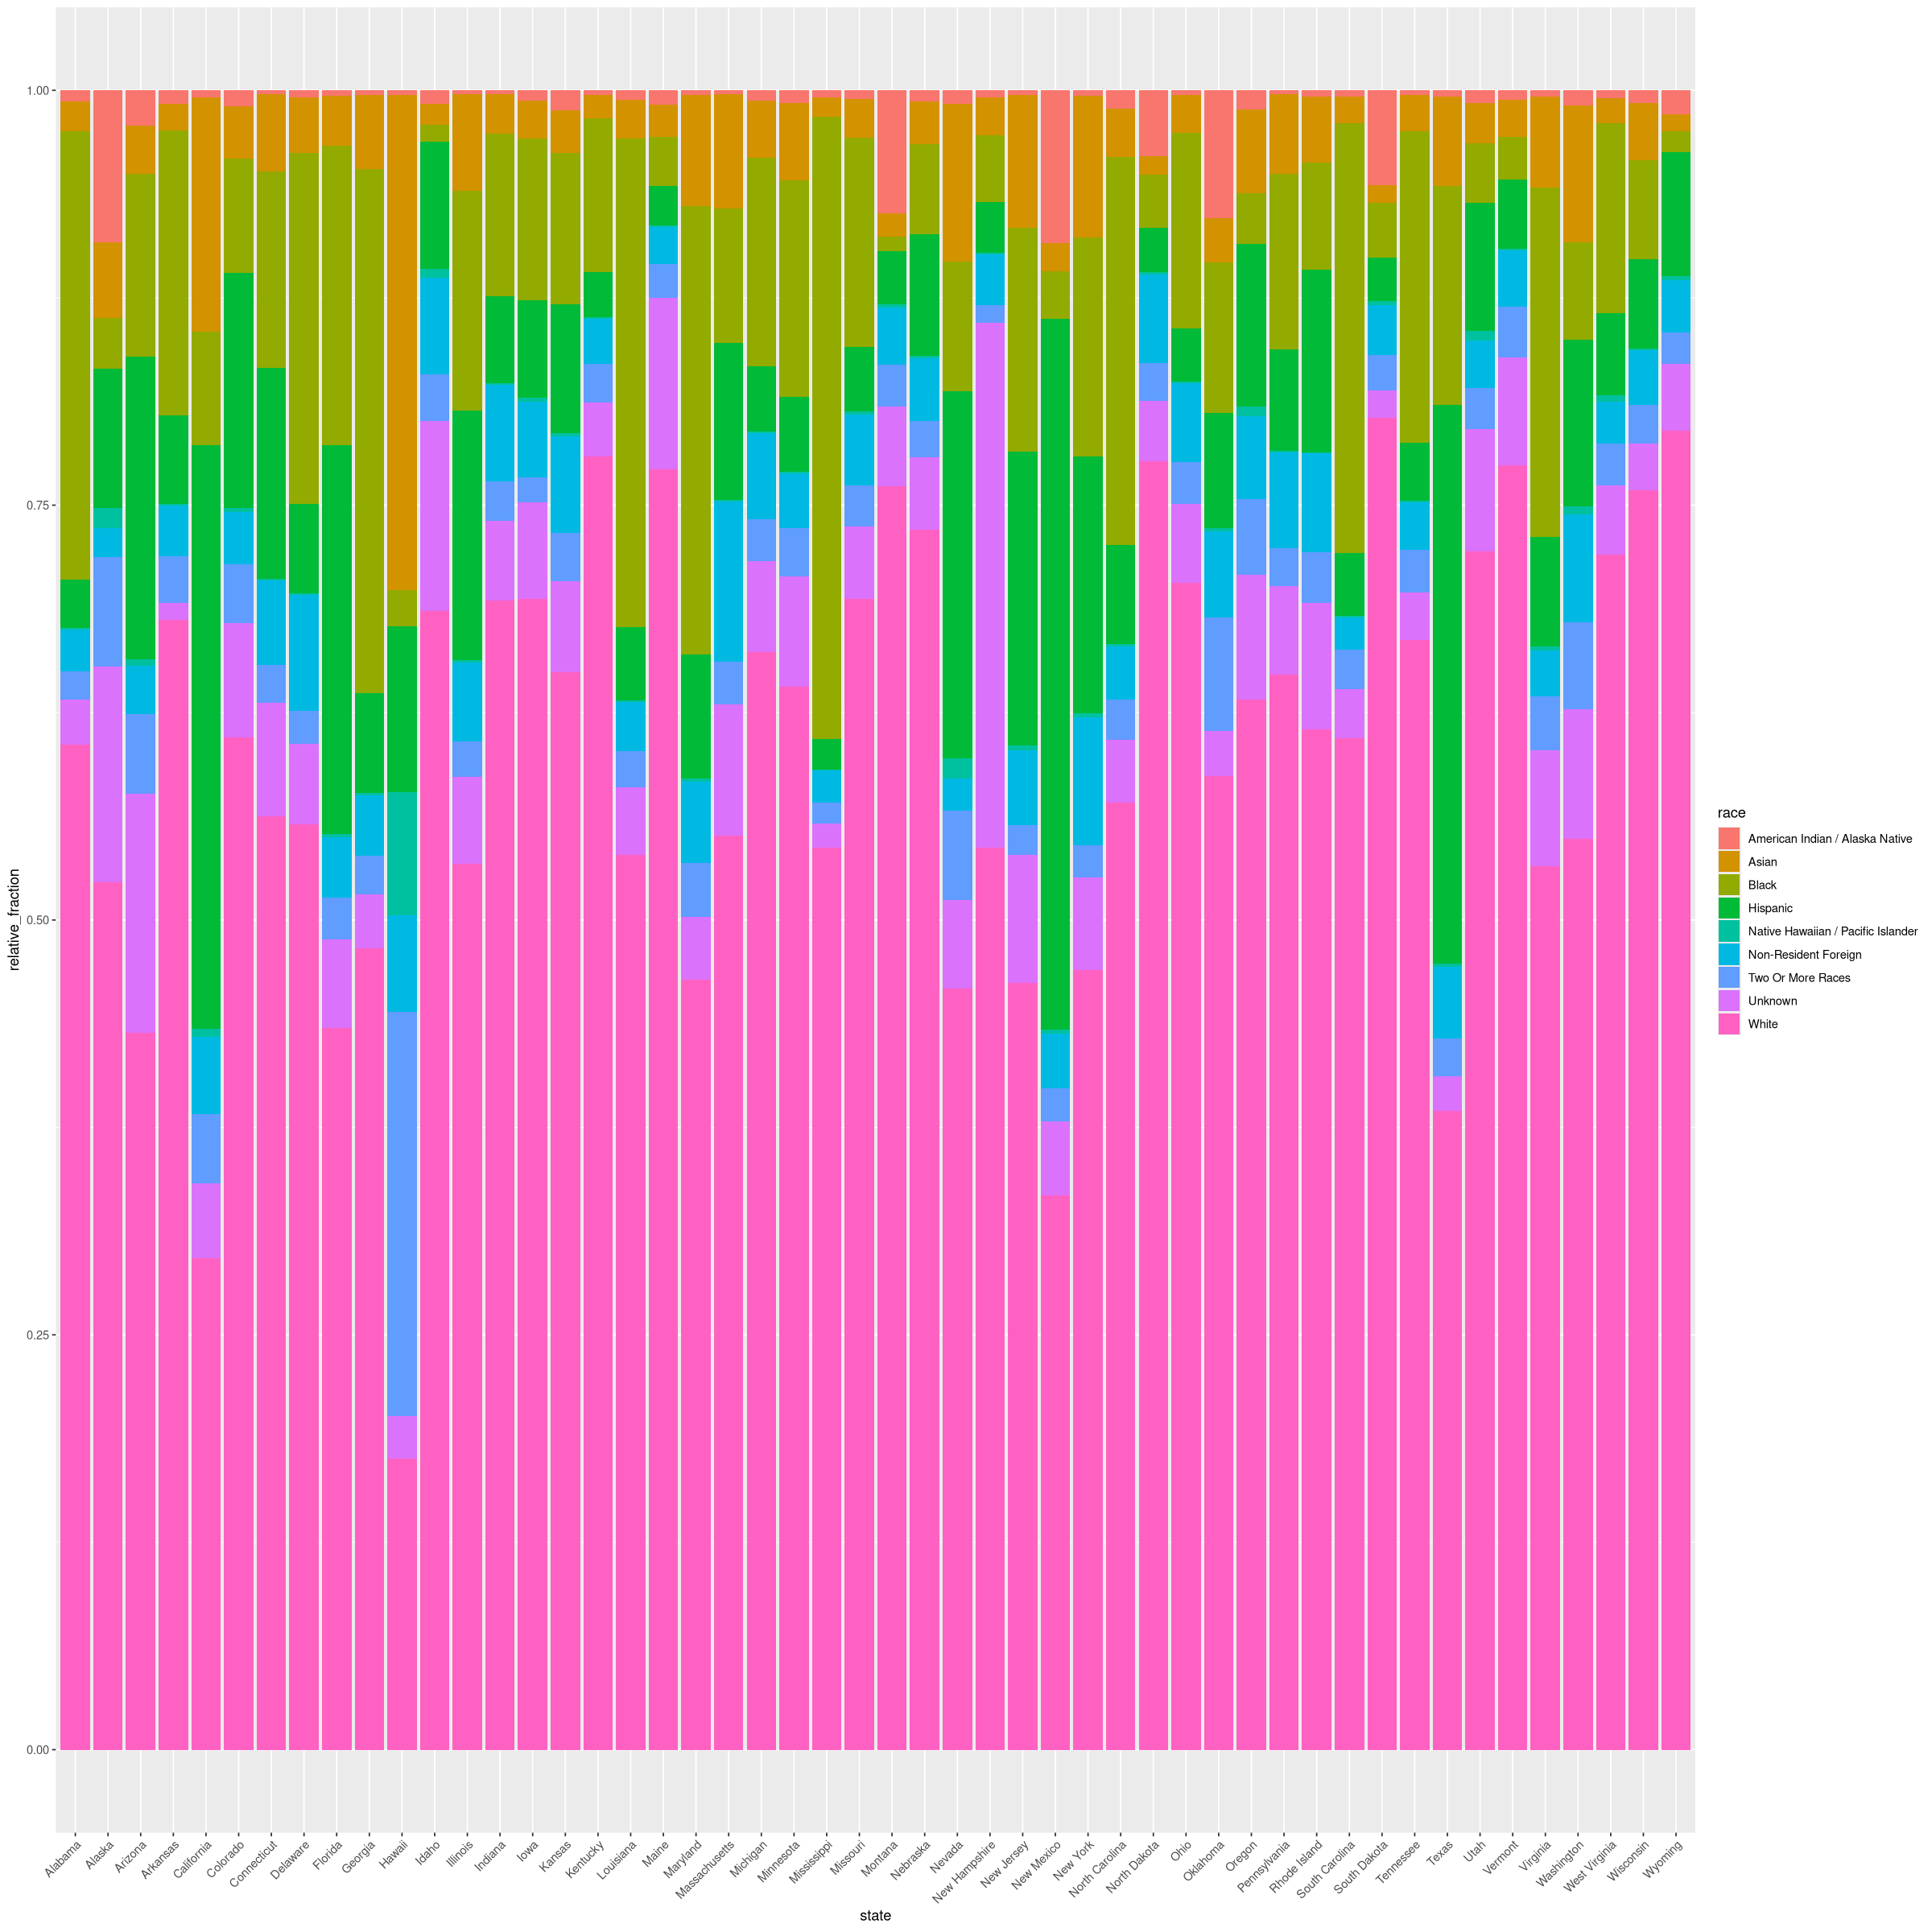

In [ ]:
# PLOT 1 - Racial diversity in schools by state
# Convert all character columns to factors
diversity_update <- diversity_school %>%
    dplyr::mutate_if(is.character, as.factor)

# Diversity by state
diversity_by_state <- diversity_update %>%
    tidyr::complete(name, category, fill = list(total = 0)) %>% # ensure every combination of school and diversity category exists
    dplyr::group_by(state, category) %>%
    dplyr::summarise(total = sum(enrollment)) %>%
    tidyr::pivot_wider(names_from = category, values_from = total) %>%
    dplyr::filter(!is.na(state))

# total enrollment by state
total_enrollment_by_state <- diversity_update %>%
    dplyr::group_by(name, state) %>%
    dplyr::distinct(total_enrollment) %>%
    dplyr::group_by(state) %>%
    dplyr::summarise(total_enrollment = sum(total_enrollment))

# Merge the two dataframes
diversity_by_state <- diversity_by_state %>%
    dplyr::left_join(total_enrollment_by_state, by = "state")

# Keep columns containing racial demographic categories
cols_to_keep <- c(
  "state",
  "American Indian / Alaska Native",
  "Asian",
  "Black",
  "Hispanic",
  "Native Hawaiian / Pacific Islander",
  "Two Or More Races",
  "White",
  "Non-Resident Foreign",
  "Unknown",
  "total_enrollment"
)
diversity_by_state <- diversity_by_state %>% select(all_of(cols_to_keep))

# Calculate the percentage of each demographic category
diversity_prop <- diversity_by_state %>%
    mutate(across(`American Indian / Alaska Native`:`Unknown`, ~ . / total_enrollment, .names = "rel_{col}")) %>%
    select(state, starts_with("rel_")) %>%
    pivot_longer(cols = starts_with("rel_"), 
                 names_to = "race", 
                 values_to = "relative_fraction") %>%
    mutate(race = gsub("rel_", "", race)) # Clean up demographic names

head(diversity_prop)

ggplot(diversity_prop, aes(x = state, y = relative_fraction, fill = race)) +
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


name,total_cost
<fct>,<dbl>
Aaniiih Nakoda College,17030.00
Abilene Christian University,44355.60
Abraham Baldwin Agricultural College,14635.50
Academy College,34981.76
Academy of Art University,38655.06


rank,name,state_name,make_world_better_percent,stem_percent,total_cost_of_attendance,career_stage,avg_salary
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Auburn University,Alabama,51,31,27562.35,early_career_pay,54400
1,Auburn University,Alabama,51,31,27562.35,mid_career_pay,104500
2,University of Alabama in Huntsville,Alabama,59,45,23821.65,early_career_pay,57500
2,University of Alabama in Huntsville,Alabama,59,45,23821.65,mid_career_pay,103900
3,The University of Alabama,Alabama,50,15,27926.07,early_career_pay,52300


`geom_smooth()` using formula = 'y ~ x'


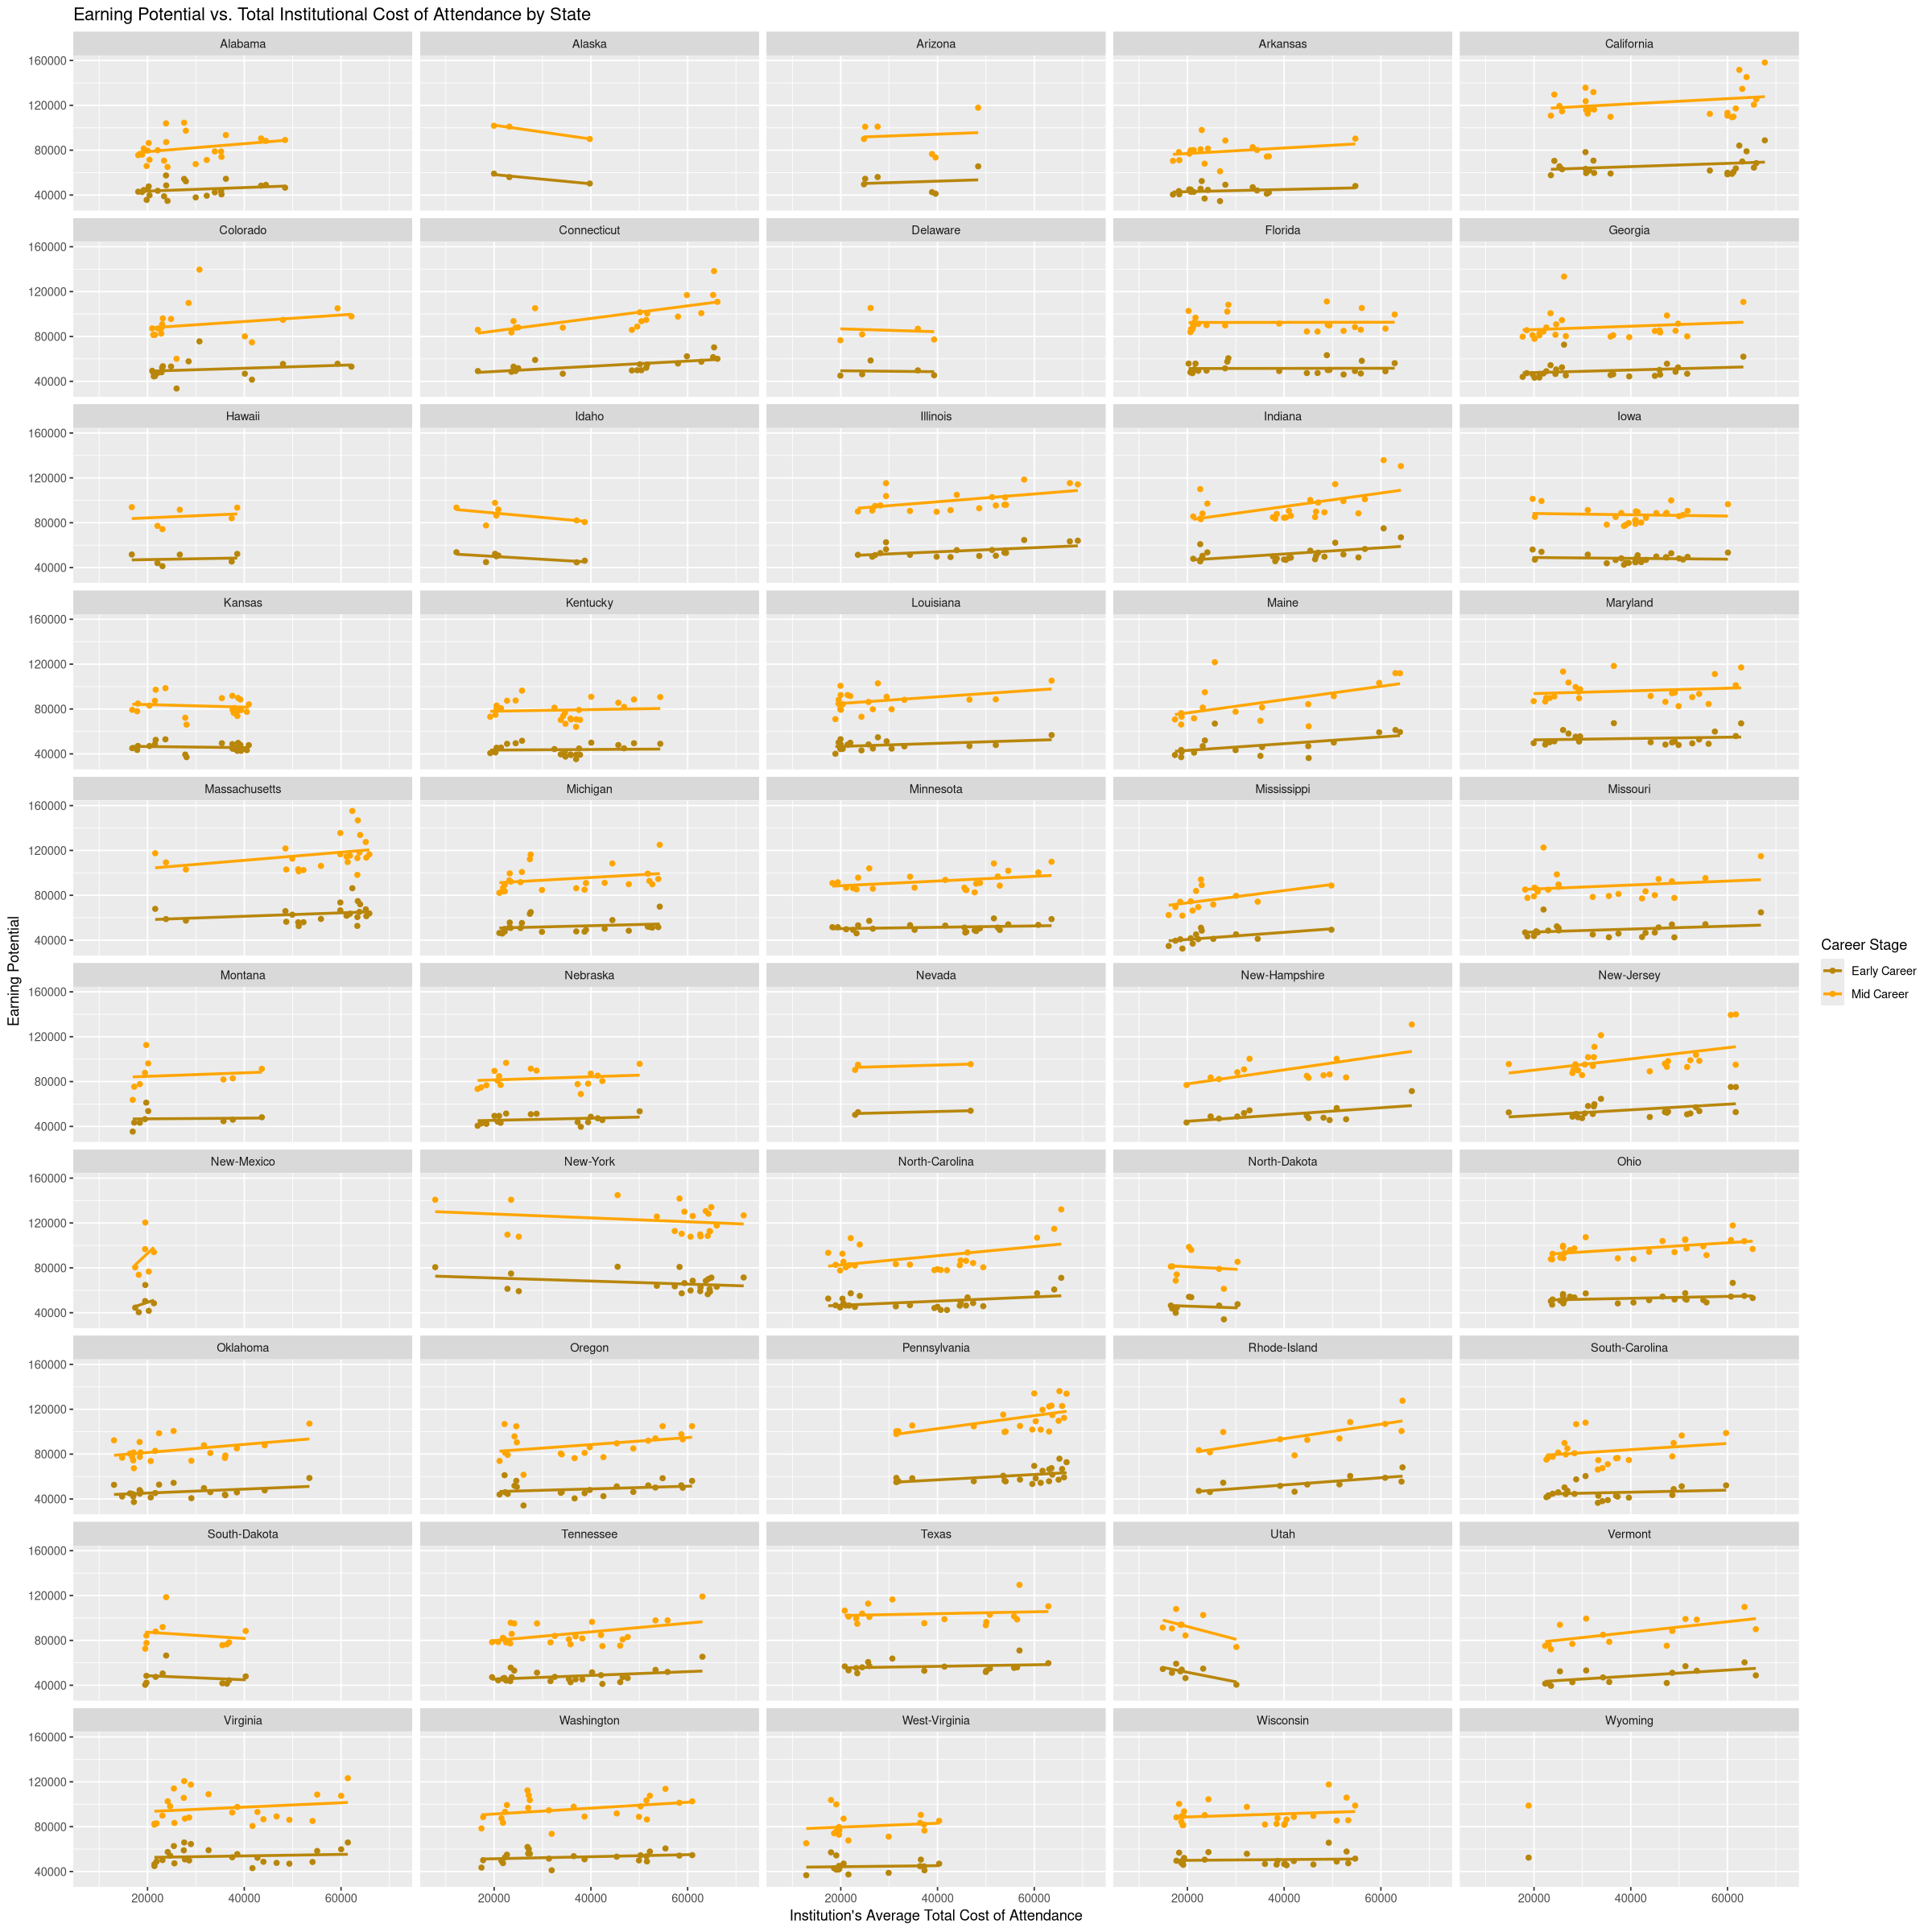

In [ ]:
# PLOT 2 - Salary vs Cost-of-Attendance by State
avg_total_cost_by_institution <- tuition_income %>%
    dplyr::mutate_if(is.character, as.factor) %>%
    dplyr::select(name, total_price) %>%
    dplyr::group_by(name) %>%
    dplyr::summarise(total_cost = mean(total_price))
head(total_cost, n = 5)

salary_by_coa <- salary_potential %>%
    dplyr::mutate_if(is.character, as.factor) %>%
    dplyr::distinct() %>%
    dplyr::left_join(avg_total_cost_by_institution, by = "name") %>% 
    dplyr::filter(!is.na(total_cost)) %>%
    dplyr::rename(total_cost_of_attendance = total_cost) %>%
    pivot_longer(cols = c(early_career_pay, mid_career_pay), 
               names_to = "career_stage", 
               values_to = "avg_salary")
head(salary_by_coa, n = 5)

ggplot(salary_by_coa, aes(x = total_cost_of_attendance, y = avg_salary, color = career_stage)) + 
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  facet_wrap(~ state_name, nrow = 10) +
    labs(
    title = "Earning Potential vs. Total Institutional Cost of Attendance by State",
    x = "Institution's Average Total Cost of Attendance",
    y = "Earning Potential",
    color = "Career Stage"
  ) +
  scale_color_manual(
    values = c("early_career_pay" = "darkgoldenrod", "mid_career_pay" = "orange"),
    labels = c("early_career_pay" = "Early Career", "mid_career_pay" = "Mid Career")
  )

type,year,tuition_type,tuition_cost
<chr>,<chr>,<chr>,<dbl>
All Institutions,1985,All Constant,10893
All Institutions,1995,All Constant,13822
All Institutions,2000,All Constant,14995
All Institutions,2001,All Constant,15497
All Institutions,2002,All Constant,16008


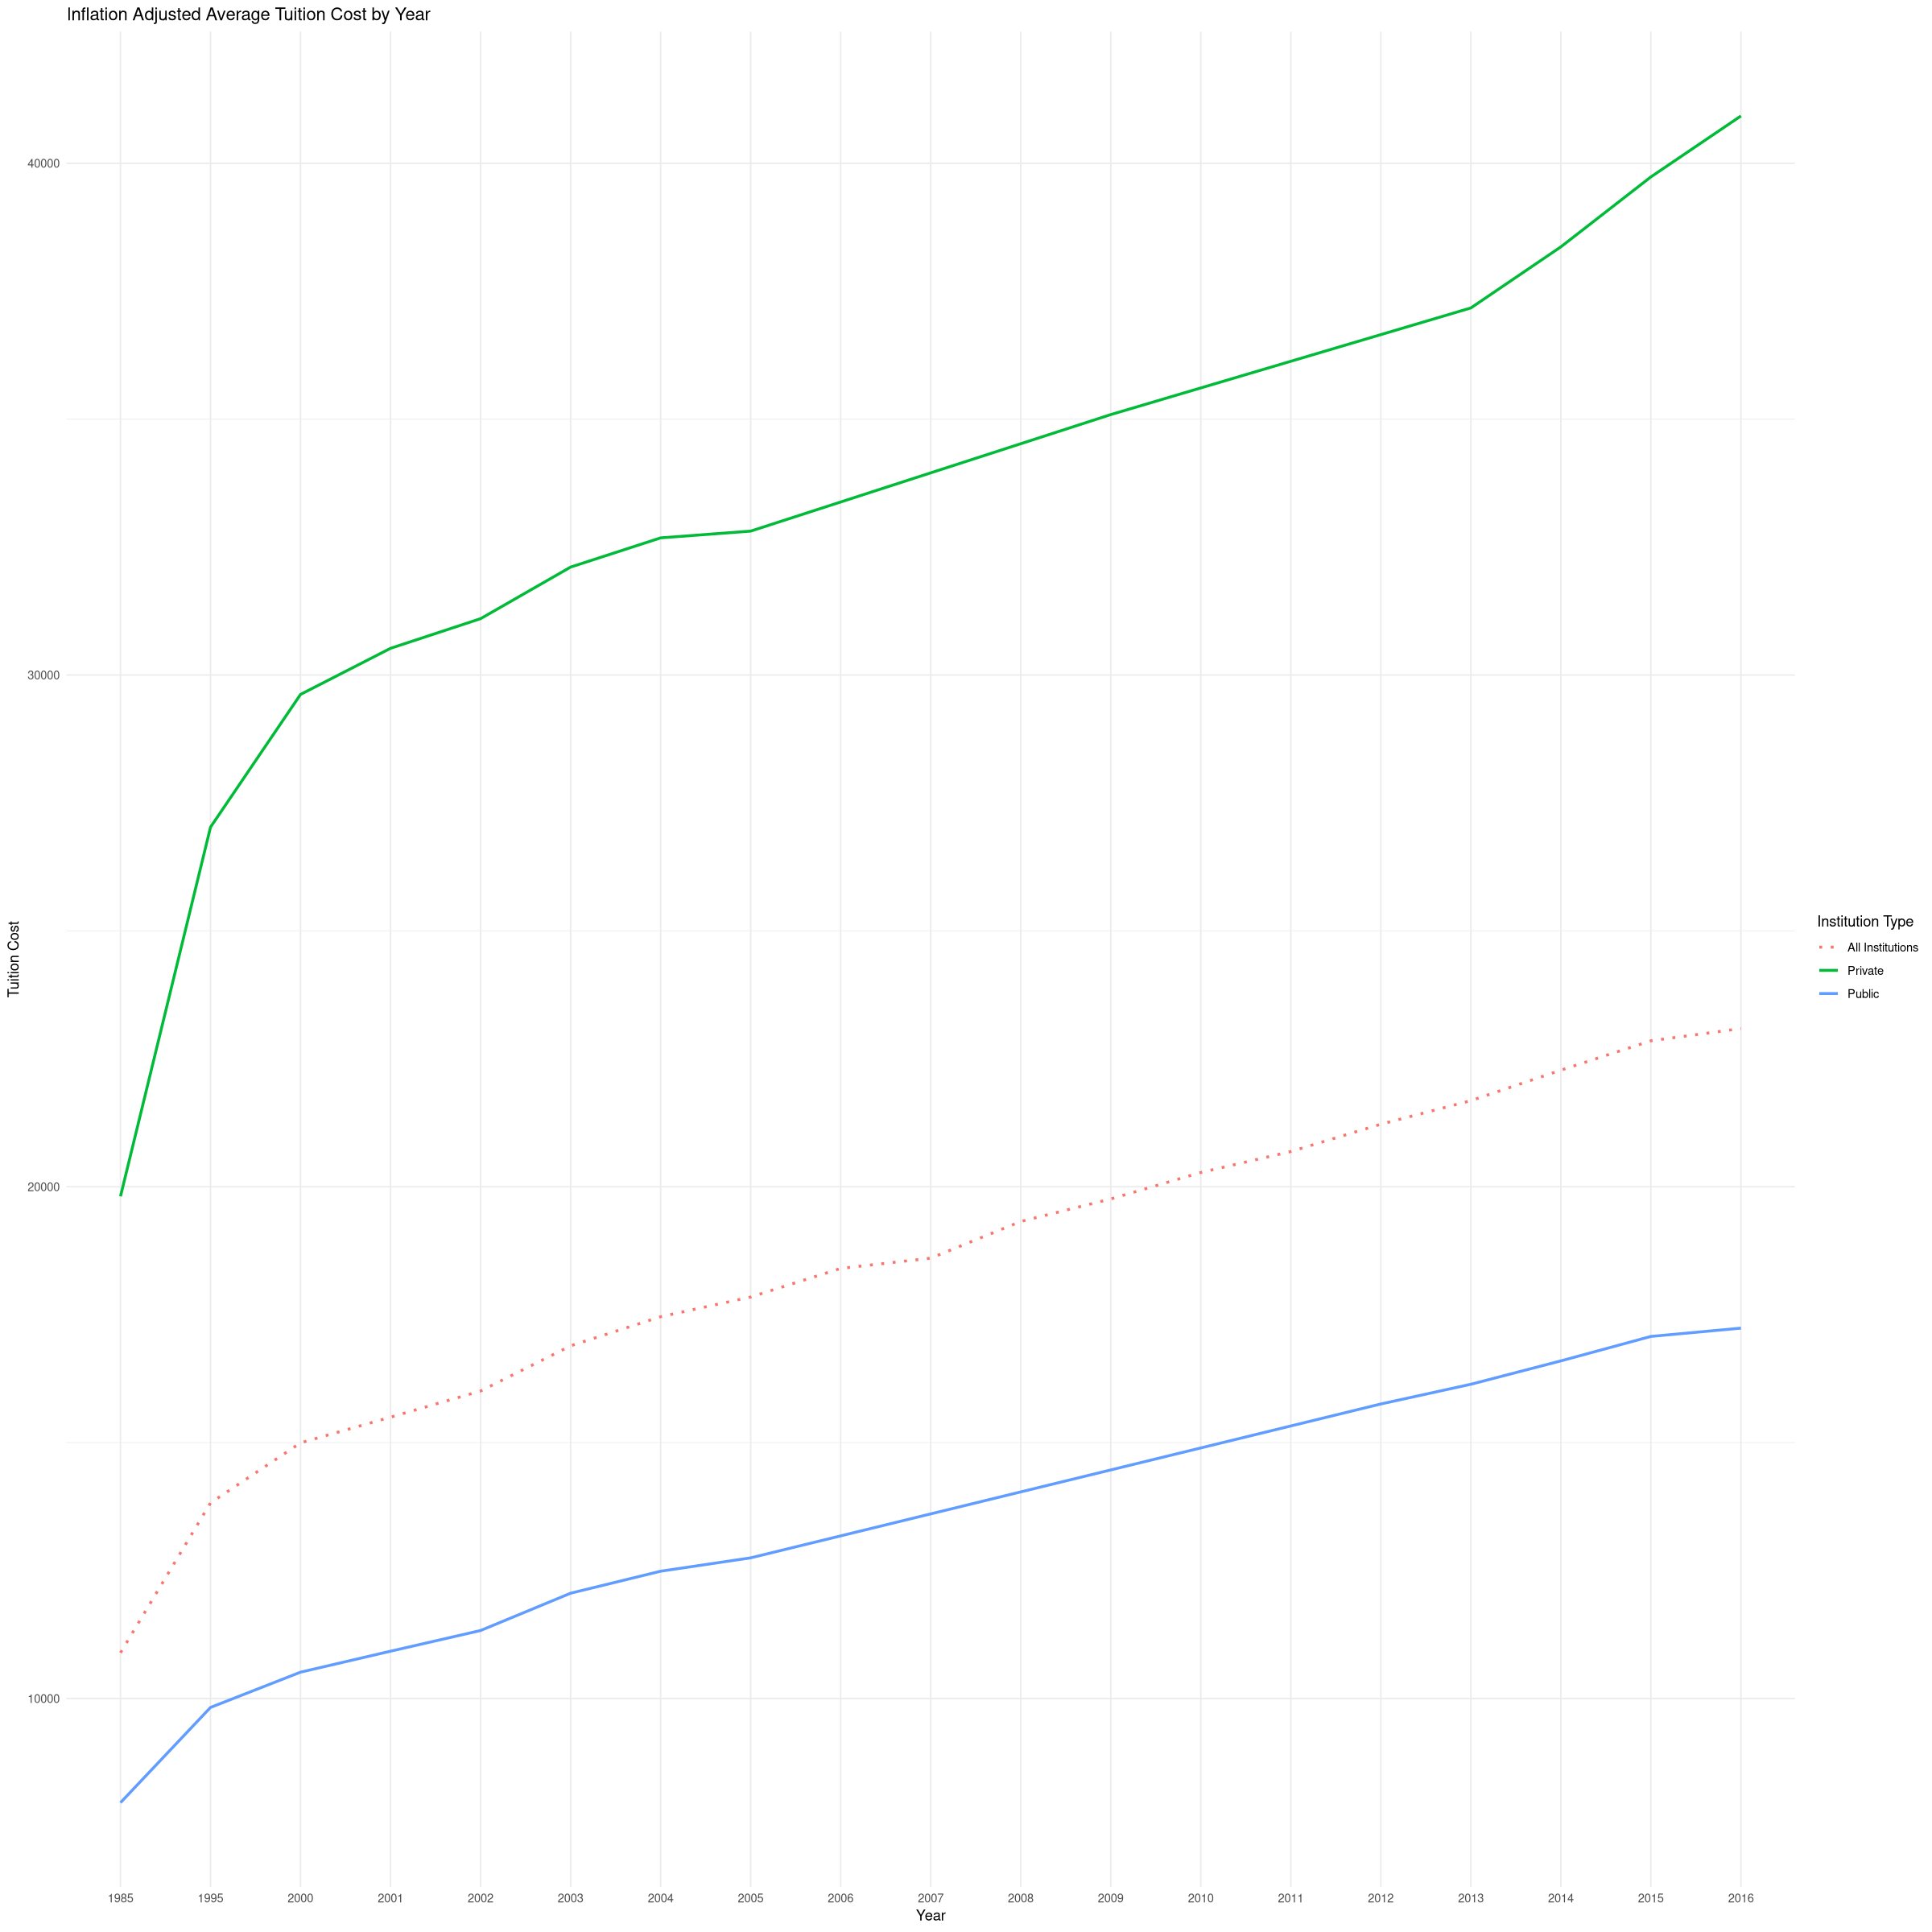

In [252]:
# PLOT 3 

inflation_adjusted_avg_cost_by_year <- historical_tuition %>%
  mutate(year = sub("-.*", "", year)) %>%
  dplyr::filter(tuition_type == "All Constant")

head(inflation_adjusted_avg_cost_by_year, n = 5)

# Assuming inflation_adjusted_avg_cost_by_year is your data frame
ggplot(inflation_adjusted_avg_cost_by_year, aes(x = year, y = tuition_cost, color = type, group = type)) +
  geom_line(aes(linetype = type, size = type)) +
  scale_linetype_manual(values = c("All Institutions" = "dotted", "Public" = "solid", "Private" = "solid")) +
  scale_size_manual(values = c("All Institutions" = 1, "Public" = 1, "Private" = 1)) +
  labs(
    title = "Inflation Adjusted Average Tuition Cost by Year",
    x = "Year",
    y = "Tuition Cost",
    color = "Institution Type",
    linetype = "Institution Type",
    size = "Institution Type"
  ) +
  theme_minimal()